# Import labraries

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize

from sklearn.datasets import load_iris

In [2]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# Load dataset

In [3]:
data =load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame({
    data["feature_names"][0]:[i[0] for i in data["data"]],
    data["feature_names"][1]:[i[1] for i in data["data"]],
    data["feature_names"][2]:[i[2] for i in data["data"]],
    data["feature_names"][3]:[i[3] for i in data["data"]],
    "label":data["target"]
})
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df = df.sample(frac=1)

In [6]:
features = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
normalized_features = normalize(features,axis=0)
labels = df[["label"]].values
one_hot_labels = np.array([np.eye(3)[i[0]] for i in labels])
normalized_features.shape, features.shape, labels.shape, one_hot_labels.shape

((150, 4), (150, 4), (150, 1), (150, 3))

## visualization

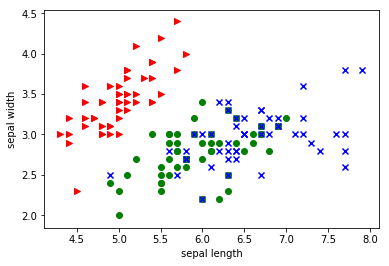

In [7]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
    plt.scatter(df[df["label"] == t]["sepal length (cm)"].values,
                df[df["label"] == t]["sepal width (cm)"].values,
                marker = marker,
                c = c)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
plt.show()

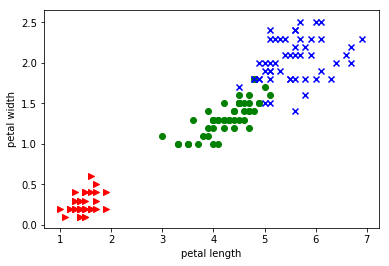

In [8]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
    plt.scatter(df[df["label"] == t]["petal length (cm)"].values,
                df[df["label"] == t]["petal width (cm)"].values,
                marker = marker,
                c = c)
    plt.xlabel("petal length")
    plt.ylabel("petal width")
plt.show()

# single layer model

## Define model

In [9]:
X = tf.placeholder(tf.float32, [None, 4], name="features")
Y = tf.placeholder(tf.int64, [None, 3], name="label")

In [10]:
W1 = tf.Variable(tf.random_normal([4, 3]))
b1 = tf.Variable(tf.random_normal([3]))

In [11]:
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)

Y_pred = tf.nn.softmax(L1)

In [12]:
# cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(Y_pred), axis=1))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=L1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
training = optimizer.minimize(cost)

In [13]:
prediction = tf.argmax(Y_pred, axis=1)

## Train

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50000):
    none, _cost = sess.run(
        [training, cost], 
        feed_dict={
            X:normalized_features,
            Y:one_hot_labels,
        })
    if step % 5000 == 0:
        print(step, _cost)

0 1.1960503
5000 1.0306839
10000 1.0072708
15000 0.9938375
20000 0.9825896
25000 0.9720597
30000 0.9622598
35000 0.9539049
40000 0.9465983
45000 0.9400311


## Evaluate

In [15]:
is_correct = tf.equal(prediction, tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [16]:
_prediction, _accuracy = sess.run([prediction, accuracy], feed_dict={
    X:normalized_features,
    Y:one_hot_labels
})
y_array = labels.reshape(150)
print(f"(실제값, 예측값): {[(i,j) for i, j in zip(y_array, _prediction)]}")
print(f"정확도: {_accuracy}")

(실제값, 예측값): [(2, 2), (0, 0), (1, 2), (2, 2), (2, 2), (0, 0), (1, 2), (2, 2), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (1, 2), (0, 0), (0, 0), (0, 0), (0, 0), (2, 2), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (1, 2), (0, 0), (1, 2), (2, 2), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (1, 0), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (2, 2), (1, 2), (1, 2), (1, 2), (0, 0), (1, 2), (2, 2), (0, 0), (2, 2), (0, 0), (1, 2), (0, 0), (0, 0), (2, 2), (2, 2), (0, 0), (1, 2), (0, 0), (0, 0), (2, 2), (1, 2), (1, 2), (2, 2), (2, 2), (1, 2), (0, 0), (0, 0), (2, 2), (2, 2), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (0, 0), (1, 2), (1, 2), (0, 0), (0, 0), (1, 2), (1, 2), (2, 2), (2, 2), (0, 0), (2, 2), (1, 2), (0, 0), (1, 2), (1, 2), (1, 0), (0, 0), (0, 0), (2, 2), (2, 2), (0, 0), (0, 0), (1, 2), (2, 2), (1, 2), (1, 2), (1, 2), (2, 2), (1, 2), (1, 2), (0, 0), (2, 2), (0, 0), (1, 2), (0, 0), (2, 2), (1, 2), (2, 2), (0, 0), (0, 0), (1, 2), (0, 0), (1, 2), (1, 2), (1, 2), (1, 2), (2, 2), (2,

# deep neural network model

## Define model

In [52]:
X = tf.placeholder(tf.float32, [None, 4], name="features")
Y = tf.placeholder(tf.float32, [None, 3], name="label")

W1 = tf.Variable(tf.random_normal([4, 8]))
b1 = tf.Variable(tf.random_normal([8]))

W2 = tf.Variable(tf.random_normal([8, 3]))
b2 = tf.Variable(tf.random_normal([3]))

L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)
L2 = tf.add(tf.matmul(L1, W2), b2)
L2 = tf.nn.relu(L2)

Y_pred = tf.nn.softmax(L2)

In [53]:
# cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(Y_pred), axis=1))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=L2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
training = optimizer.minimize(cost)

In [54]:
prediction = tf.argmax(Y_pred, axis=1)
is_correct = tf.equal(prediction, tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

## Train

In [55]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50000):
    none, _cost = sess.run(
        [training, cost], 
        feed_dict={
            X: normalized_features,
            Y: one_hot_labels
        })
    if step % 5000 == 0:
        print(step, _cost)


0 1.2678119
5000 0.6271562
10000 0.50036466
15000 0.11582152
20000 0.084343195
25000 0.07275895
30000 0.06643128
35000 0.062236577
40000 0.05913634
45000 0.056692854


## Evaluate

In [56]:
_prediction, _accuracy = sess.run([prediction, accuracy], feed_dict={
    X:normalized_features,
    Y:one_hot_labels
})
y_array = labels.reshape(150)
print(f"(실제값, 예측값): {[(i,j) for i, j in zip(y_array, _prediction)]}")
print(f"정확도: {_accuracy}")

(실제값, 예측값): [(2, 2), (0, 0), (1, 1), (2, 1), (2, 2), (0, 0), (1, 1), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (2, 2), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (1, 1), (0, 0), (1, 1), (2, 2), (0, 0), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (1, 1), (0, 0), (2, 2), (0, 0), (0, 0), (0, 0), (2, 2), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (2, 2), (0, 0), (2, 2), (0, 0), (1, 1), (0, 0), (0, 0), (2, 2), (2, 2), (0, 0), (1, 1), (0, 0), (0, 0), (2, 2), (1, 2), (1, 1), (2, 2), (2, 2), (1, 1), (0, 0), (0, 0), (2, 2), (2, 2), (1, 1), (1, 1), (1, 1), (0, 0), (2, 2), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (2, 2), (2, 2), (0, 0), (2, 2), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (2, 2), (2, 2), (0, 0), (0, 0), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (0, 0), (2, 2), (0, 0), (1, 1), (0, 0), (2, 2), (1, 2), (2, 2), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (2,